In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sms_raw = pd.read_csv("imdb_labelled.txt", delimiter= '\t', header=None)
sms_raw.columns = ['Message', 'Positive']
map_dict = {1: "Positive",0: 'Negative'}
sms_raw['Positive']=sms_raw.Positive.map(map_dict)

In [3]:
sms_raw['Message'] = sms_raw['Message'].str.replace(',', '')
sms_raw['Message'] = sms_raw['Message'].str.replace('/', '')
sms_raw['Message'] = sms_raw['Message'].str.replace(':', '')
sms_raw['Message'] = sms_raw['Message'].str.replace(';', '')
sms_raw['Message'] = sms_raw['Message'].str.replace("'", '')
sms_raw['Message'] = sms_raw['Message'].str.replace('"', '')
sms_raw['Message'] = sms_raw['Message'].str.replace('.', '')
sms_raw['Message'] = sms_raw['Message'].str.replace('-', '')
sms_raw['Message'] = sms_raw['Message'].str.replace('_', '')
sms_raw['Message'] = sms_raw['Message'].str.replace('+', '')
sms_raw['Message'] = sms_raw['Message'].str.replace('&', '')
sms_raw['Message'] = sms_raw['Message'].str.replace('$', '')
sms_raw['Message'] = sms_raw['Message'].str.replace('%', '')
sms_raw['Message'] = sms_raw['Message'].str.replace('@', '')
sms_raw['Message'] = sms_raw['Message'].str.replace('!', '')
sms_raw['Message'] = sms_raw['Message'].str.replace('(', '')
sms_raw['Message'] = sms_raw['Message'].str.replace(')', '')


In [4]:
import re
from collections import Counter

with open('imdb_labelled.txt') as f:
    passage = f.read()

words = re.findall(r'\w+', passage)

cap_words = [word.upper() for word in words]

word_counts = Counter(cap_words)


In [178]:
print (word_counts)

Counter({'THE': 849, '1': 507, '0': 502, 'AND': 434, 'A': 433, 'OF': 377, 'IS': 339, 'IT': 325, 'I': 301, 'THIS': 292, 'TO': 253, 'IN': 203, 'WAS': 186, 'MOVIE': 182, 'S': 167, 'THAT': 165, 'FILM': 163, 'FOR': 105, 'T': 104, 'AS': 94, 'BUT': 93, 'WITH': 90, 'YOU': 85, 'ONE': 79, 'ON': 76, 'ARE': 75, 'NOT': 73, 'BAD': 71, 'VERY': 65, 'ALL': 65, 'SO': 63, 'JUST': 63, 'THERE': 59, 'GOOD': 58, 'AT': 55, 'AN': 55, 'BE': 53, 'ABOUT': 50, 'HAVE': 49, 'BY': 49, 'LIKE': 48, 'FROM': 46, 'IF': 45, 'ACTING': 43, 'TIME': 43, 'OUT': 42, 'HIS': 42, 'HE': 42, 'OR': 41, 'REALLY': 41, 'GREAT': 41, 'EVEN': 40, 'WHO': 39, 'WERE': 38, 'HAS': 38, 'CAN': 36, 'SEE': 36, 'MY': 36, 'CHARACTERS': 35, 'WELL': 35, 'MOST': 32, 'HOW': 32, 'MORE': 31, 'NO': 31, 'THEY': 30, 'ONLY': 30, 'WHEN': 29, 'EVER': 29, '10': 29, 'MOVIES': 29, 'PLOT': 28, 'STORY': 28, 'MADE': 27, 'SOME': 27, 'DON': 26, 'BEST': 25, 'BECAUSE': 25, 'YOUR': 25, 'ALSO': 25, 'FILMS': 24, 'THAN': 24, 'ITS': 24, 'CHARACTER': 24, 'WOULD': 24, 'SCRIPT': 2

In [25]:
keywords = ['good', 'great', 'like', 'liked', 'beautiful', 'love', 'excellent', 'wonderful','superbly', 'best', 'well', 'recommend', 'cool', 'top']

In [26]:
for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.o
    sms_raw[str(key)] = sms_raw.Message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [8]:
sms_raw['Positive'] = (sms_raw['Positive'] == 'Positive')

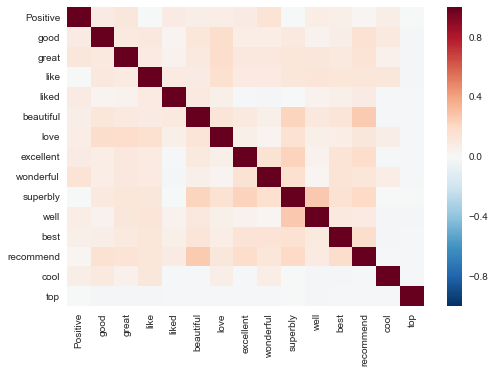

In [27]:
sns.heatmap(sms_raw.corr())

In [28]:
data = sms_raw[keywords]
target = sms_raw['Positive']

In [29]:
from sklearn.naive_bayes import BernoulliNB

In [30]:
bnb = BernoulliNB()

In [31]:
bnb.fit(data, target)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [32]:
y_pred = bnb.predict(data)

In [33]:
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()))

Number of mislabeled points out of a total 748 points : 290


The model works decently well but is by no means perfect. After testing it several times I realized by going through the word counter and adding every positive word to my list slightly improved the model each time. At this point I decided to stick with just using the word model since it is really the only one the sample example relied on. Many of the words shared a high correlation but again we were able to look at the word counter and cherry pick the positive words that were used most often. Another reason for the model not performing amazingly well is many words meanings can be manipulated by using not and other negative qualifiers.